# Jupyter Notebook
Sie befinden sich hier in einem Jupyter Notebook. Ein Notebook besteht aus Zellen. Diese können, wie diese Zelle, Texte und Abbildungen enthalten oder Programmcode. 
Zellen mit Programmcode werden ausgeführt, in dem die Zelle durch Hineinklicken aktiviert wird und anschließend "str + enter" gedrückt wird, oder der "run"-Button in der Menüleiste oben.
Bei Problemen gern in Diskussionsforum schreiben oder eine Email an stine@geophysik.fu-berlin.de.

## Elastische Moduln und seismische Geschwindigkeiten

Dieses Jupyter-Notebook berechnet mithilfe beliebiger seismischer Moduln Wellengeschwindigkeiten.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def velocities(mu,lamda,rho): 
    vs = np.sqrt(mu/rho)
    vp = np.sqrt((lamda+2*mu)/rho)
    return [vp,vs]
def mu_lamda(E,K,sigma): 
    mu = 9*K*E/(9*K-E)
    lamda = 3*K*(3*K-E)/(9*K-E)
    return [mu,lamda]
def K_sig_E(lamda,mu):
    E = mu*((3*lamda+2*mu)/(lamda+mu))
    sigma = lamda/(2*(lamda+mu))
    K = lamda+2/3*mu
    return [E,sigma,K]
    
    
def elastic_moduli(vp=np.nan,vs=np.nan,rho=np.nan,E=np.nan,sigma=np.nan,K=np.nan,mu=np.nan,lamda=np.nan):
    if (~np.isnan(E) & ~np.isnan(sigma)):#1
        K = E/(3*(1-2*sigma))
        [mu,lamda] = mu_lamda(E,K,sigma)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho])
    
    if (~np.isnan(E) & ~np.isnan(K)): #2
        sigma = (3*K-E)/(6*k)
        [mu,lamda] = mu_lamda(E,K,sigma)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho])
    
    if (~np.isnan(E) & ~np.isnan(mu)): #3
        sigma = (E-2*mu)/(2*mu)
        K = (mu*E)/(3*(3*mu-E))
        [mu,lamda] = mu_lamda(E,K,sigma)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho])
    
    if (~np.isnan(sigma) & ~np.isnan(K)): #4
        E = 3*K*(1-2*sigma)
        [mu,lamda] = mu_lamda(E,K,sigma)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho]) 
    
    if (~np.isnan(sigma) & ~np.isnan(mu)): #5
        lamda = mu*(2*sigma/(1-2*sigma))
        [E,sigma,K] = K_sig_E(lamda,mu)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho])
    
    if (~np.isnan(sigma) & ~np.isnan(lamda)): #6 
        mu = lamda*((1-2*sigma)/(2*sigma))
        [E,sigma,K] = K_sig_E(lamda,mu)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho])
    
    if (~np.isnan(K) & ~np.isnan(mu)):#7
        lamda = K-2*mu/3
        [E,sigma,K] = K_sig_E(lamda,mu)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho])
    
    if (~np.isnan(K) & ~np.isnan(lamda)):#8
        mu = 1.5*(K-lamda)
        [E,sigma,K] = K_sig_E(lamda,mu)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho])
    
    if (~np.isnan(mu) & ~np.isnan(lamda)):#9
        [E,sigma,K] = K_sig_E(lamda,mu)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho])
    
    if (~np.isnan(vp) & ~np.isnan(vs) & ~np.isnan(rho)):#10
        mu = rho*vs**2
        lamda = rho*vp**2 - 2*mu
        [E,sigma,K] = K_sig_E(lamda,mu)
        return np.array([E,sigma,K,mu,lamda,*velocities(mu,lamda,rho),rho])


### zu Aufgabe 5b)
Führen Sie die oben stehende Zelle einmal aus (strg+Enter). 

Fügen Sie danach in die Zelle unten ihre von Hand berechneten Werte für jedes der 6 Gesteine ein, indem Sie hinter das '=' - Zeichen den jeweiligen Wert von K, $\sigma$ und $\rho$ eingeben. Die Schreibweise $*10^{10}$ lässt sich im Jupyter-Notebook mithilfe von '$*10**10$' realisieren, $2.5*10^{10}$ wäre also '$2.5*10**10$'. 

Welche generellen Zusammenhänge lassen sich zwischen den seismischen Geschwindigkeiten und den elastischen Parametern feststellen ?

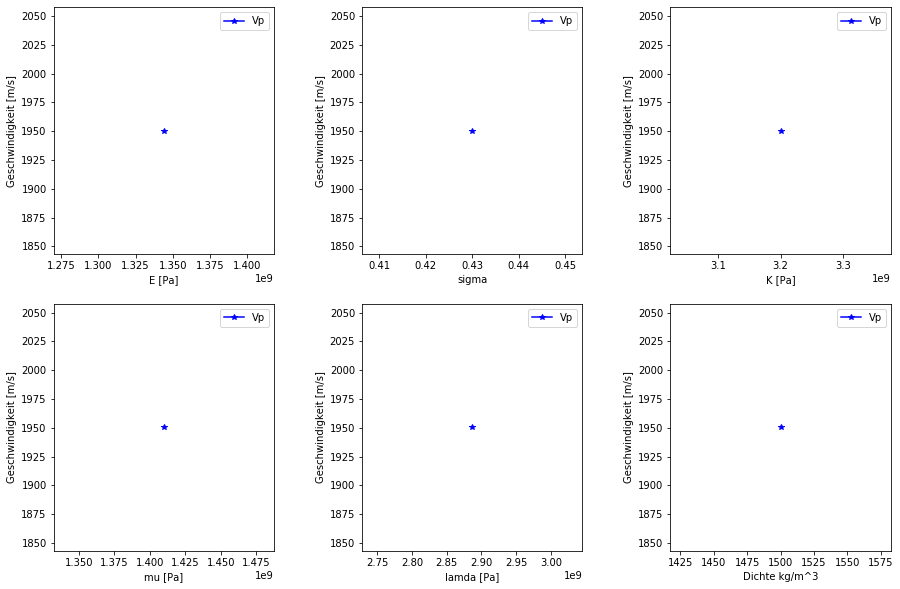

In [4]:
tab = np.zeros([6,8])*np.NaN # 6 Gesteine, 8 Parameter)

## Fügen Sie hier Ihre berechneten Werte ein 

tab[0,:]=elastic_moduli(K=5.5*10**9 ,sigma=0.5 ,rho=1000 ) # Wasser
tab[1,:]=elastic_moduli(K=4.2*10**9 ,sigma=0.43 ,rho=1500 ) # Schlamm
tab[2,:]=elastic_moduli(K=10.34*10**9 ,sigma=0.38 ,rho=1800 ) # Tonschiefer
tab[3,:]=elastic_moduli(K=13.57*10**9 ,sigma=0.34 ,rho=1900 ) # Sandstein
tab[4,:]=elastic_moduli(K=34*10**9 ,sigma=0.25 ,rho=2500 ) # Kalkstein
tab[5,:]=elastic_moduli(K=21.56*10**9 ,sigma=0.2 ,rho=2700 ) # Granit

## Ab hier nichts mehr verändern


rock = ['Wasser','Schlamm','Tonschiefer','Sandstein','Kalkstein','Granit']
param = ['E [Pa]','sigma','K [Pa]','mu [Pa]','lamda [Pa]','Geschwindigkeit [m/s]','Geschwindigkeit [m/s]','Dichte kg/m^3']
combi = [0,1,2,3,4,7]

plt.figure(figsize=(15,10))

rocknum = 1

for i in range(6):
    plt.subplot(2,3,i+1)
    #plt.plot(tab[rocknum,combi[i]],tab[rocknum,5],'b*-',label='Vp')
    plt.plot((tab[np.argsort(tab[:,combi[i]]),combi[i]]),(tab[np.argsort(tab[:,combi[i]]),5]),'b*-',label='Vp')
    plt.plot((tab[np.argsort(tab[:,combi[i]]),combi[i]]),(tab[np.argsort(tab[:,combi[i]]),6]),'r*-',label='Vs')
    plt.legend()
    plt.xlabel(param[i])
    plt.ylabel(param[6])
plt.xlabel(param[7])
plt.subplots_adjust(wspace = 0.4,hspace = 0.2)
